In [90]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as mpl
import requests

# 0) 
Show all your code to acquire the dataset in your notebook. If you fail to show how you acquired the dataset, you will earn a zero on the assignment.


In [91]:
read1=pd.read_csv("https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=2016-01-01&endtime=2016-12-31&minmagnitude=4&limit=20000")
read2=pd.read_csv("https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=2017-01-01&endtime=2017-12-31&minmagnitude=4&limit=20000")
read3=pd.read_csv("https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=2018-01-01&endtime=2018-12-31&minmagnitude=4&limit=20000")
read4=pd.read_csv("https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=2019-01-01&endtime=2019-10-01&minmagnitude=4&limit=20000")
df= pd.concat([read1,read2,read3,read4],axis=0)

# 1) 
Use describe to get the basic statistics of all the columns (5 points)

In [92]:
 df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,52902.000000,52902.000000,52902.000000,52902.000000,399.000000,52054.000000,52009.000000,52902.000000,52460.000000,52902.000000,51126.000000,51329.000000
mean,1.919104,33.886803,94.095779,4.527203,44.784461,110.643888,3.707861,0.826555,8.743854,5.445905,0.121057,42.235676
std,28.958258,124.366556,147.834828,0.398523,33.195457,51.054256,4.734197,0.263101,3.660914,4.203330,0.065049,61.349190
min,-79.983700,-179.998600,-1.010000,4.000000,4.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-19.486375,-74.498700,10.000000,4.300000,23.000000,73.000000,1.170000,0.650000,6.300000,1.900000,0.073000,12.000000
50%,-3.314150,93.851300,33.695000,4.500000,36.000000,105.000000,2.379000,0.810000,8.200000,4.800000,0.112000,21.000000
75%,24.316825,141.896125,105.970000,4.700000,61.500000,142.000000,4.395000,0.990000,10.800000,7.900000,0.153000,45.000000
max,86.996400,179.999300,690.950000,8.200000,289.000000,346.000000,62.626000,2.530000,51.700000,69.300000,1.000000,941.000000


# 2)
Get the top 10 earthquakes by magnitude (5 points)

In [93]:
df1= df.sort_values(by='mag', ascending=False)
df1.head(10)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
4490,2017-09-08T04:49:19.180Z,15.0222,-93.8993,47.39,8.2,mww,NaN,22.0,0.944,1.22,...,2019-09-12T03:25:23.535Z,"101km SSW of Tres Picos, Mexico",earthquake,6.2,3.7,0.058,29.0,reviewed,us,us
6200,2018-08-19T00:19:40.670Z,-18.1125,-178.1530,600.00,8.2,mww,NaN,13.0,3.630,0.79,...,2019-08-19T06:18:42.402Z,"286km NNE of Ndoi Island, Fiji",earthquake,9.6,1.9,0.045,47.0,reviewed,us,us
4549,2019-05-26T07:41:15.073Z,-5.8119,-75.2697,122.57,8.0,mww,NaN,17.0,3.180,0.84,...,2019-10-20T00:29:23.662Z,"78km SE of Lagunas, Peru",earthquake,7.0,4.0,0.036,75.0,reviewed,us,us
5112,2018-09-06T15:49:18.710Z,-18.4743,179.3502,670.81,7.9,mww,NaN,12.0,1.431,1.07,...,2019-04-23T04:45:27.592Z,"102km ESE of Suva, Fiji",earthquake,9.5,2.8,0.025,157.0,reviewed,us,us
13767,2018-01-23T09:31:40.890Z,56.0039,-149.1658,14.06,7.9,mww,NaN,30.0,2.585,0.77,...,2019-07-01T15:34:15.502Z,"280km SE of Kodiak, Alaska",earthquake,6.0,2.8,0.034,81.0,reviewed,us,us
771,2016-12-17T10:51:10.500Z,-4.5049,153.5216,94.54,7.9,mww,NaN,13.0,1.389,0.97,...,2018-10-17T21:50:55.380Z,"54km E of Taron, Papua New Guinea",earthquake,7.3,3.8,NaN,NaN,reviewed,us,us
12276,2017-01-22T04:30:22.960Z,-6.2464,155.1718,135.00,7.9,mww,NaN,9.0,3.625,1.22,...,2018-10-17T21:53:19.164Z,"35km WNW of Panguna, Papua New Guinea",earthquake,7.3,1.8,0.042,54.0,reviewed,us,us
11266,2016-04-16T23:58:36.980Z,0.3819,-79.9218,20.59,7.8,mww,NaN,15.0,1.440,0.94,...,2019-10-15T14:06:57.770Z,"27km SSE of Muisne, Ecuador",earthquake,5.7,3.2,NaN,NaN,reviewed,us,us
1317,2016-12-08T17:38:46.280Z,-10.6812,161.3273,40.00,7.8,mww,NaN,13.0,1.836,0.88,...,2018-10-17T21:50:46.404Z,"69km WSW of Kirakira, Solomon Islands",earthquake,8.3,1.8,NaN,NaN,reviewed,us,us
2656,2016-11-13T11:02:56.340Z,-42.7373,173.0540,15.11,7.8,mww,NaN,21.0,0.481,0.56,...,2019-04-15T21:55:36.454Z,"54km NNE of Amberley, New Zealand",earthquake,4.6,3.2,NaN,NaN,reviewed,us,us


# 3)
Handle all Null/empty data by filling it with zeros (10 points)

In [94]:
df.fillna(value=0, inplace=True) # This fills all the null values in the columns with 0.

# 4) 
Find the top 10 places where the strongest earthquakes occurred (15 points)​ (Note: Place needs to be parsed nicely to remove the KM location from them. For example: 75km WSW of Illapel, Chile should look like Illapel, Chile).

In [95]:
df['City,Country'] = df['place'].str.split('of').str[-1]
display(df)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,"City,Country"
0,2016-12-30T22:04:40.310Z,-32.9441,-179.8061,104.49,4.6,mb,0.0,157.0,4.859,0.52,...,"188km SSW of L'Esperance Rock, New Zealand",earthquake,17.1,16.8,0.314,3.0,reviewed,us,us,"L'Esperance Rock, New Zealand"
1,2016-12-30T21:08:34.060Z,13.3141,145.9761,10.00,4.9,mb,0.0,63.0,1.111,0.97,...,"119km ESE of Yigo Mayor's Office, Guam",earthquake,6.7,1.9,0.054,107.0,reviewed,us,us,"Yigo Mayor's Office, Guam"
2,2016-12-30T20:17:57.430Z,27.2869,53.2217,10.00,4.2,mb,0.0,113.0,3.553,0.72,...,"99km WSW of Gerash, Iran",earthquake,6.4,1.9,0.124,18.0,reviewed,us,us,"Gerash, Iran"
3,2016-12-30T20:08:26.820Z,37.3732,141.4590,9.09,5.1,mww,0.0,55.0,0.726,0.93,...,"42km ESE of Namie, Japan",earthquake,4.3,2.7,0.080,15.0,reviewed,us,us,"Namie, Japan"
4,2016-12-30T19:48:39.880Z,-5.4098,153.0461,19.11,5.0,mb,0.0,113.0,1.494,0.51,...,"104km S of Taron, Papua New Guinea",earthquake,4.2,5.0,0.061,86.0,reviewed,us,us,"Taron, Papua New Guinea"
5,2016-12-30T19:47:40.410Z,27.1255,53.1842,43.74,4.1,mb,0.0,116.0,3.477,0.89,...,"104km NW of Kish, Iran",earthquake,8.9,9.2,0.099,28.0,reviewed,us,us,"Kish, Iran"
6,2016-12-30T19:31:53.210Z,-31.2096,-178.5847,10.00,4.6,mb,0.0,173.0,6.837,1.25,...,"38km NE of L'Esperance Rock, New Zealand",earthquake,14.7,1.8,0.172,10.0,reviewed,us,us,"L'Esperance Rock, New Zealand"
7,2016-12-30T19:16:09.780Z,-5.0199,152.4766,10.00,4.4,mb,0.0,254.0,0.838,0.37,...,"77km SSE of Kokopo, Papua New Guinea",earthquake,7.8,2.0,0.202,7.0,reviewed,us,us,"Kokopo, Papua New Guinea"
8,2016-12-30T19:05:34.290Z,-30.7747,-178.1429,10.00,4.4,mb,0.0,237.0,7.381,0.88,...,"102km NE of L'Esperance Rock, New Zealand",earthquake,9.2,2.0,0.170,11.0,reviewed,us,us,"L'Esperance Rock, New Zealand"
9,2016-12-30T18:47:45.880Z,-12.2303,167.2556,230.86,4.4,mb,0.0,144.0,7.696,0.50,...,"185km N of Sola, Vanuatu",earthquake,15.9,8.9,0.091,35.0,reviewed,us,us,"Sola, Vanuatu"


In [96]:
df2=df[['mag', 'City,Country']].sort_values(by='mag', ascending=False)
df2.head(10)

,mag,"City,Country"
4490,8.2,"Tres Picos, Mexico"
6200,8.2,"Ndoi Island, Fiji"
4549,8.0,"Lagunas, Peru"
5112,7.9,"Suva, Fiji"
13767,7.9,"Kodiak, Alaska"
771,7.9,"Taron, Papua New Guinea"
12276,7.9,"Panguna, Papua New Guinea"
11266,7.8,"Muisne, Ecuador"
1317,7.8,"Kirakira, Solomon Islands"
2656,7.8,"Amberley, New Zealand"


In [97]:
df1= df.sort_values(by='mag', ascending=False)
df1.head(10)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,"City,Country"
4490,2017-09-08T04:49:19.180Z,15.0222,-93.8993,47.39,8.2,mww,0.0,22.0,0.944,1.22,...,"101km SSW of Tres Picos, Mexico",earthquake,6.2,3.7,0.058,29.0,reviewed,us,us,"Tres Picos, Mexico"
6200,2018-08-19T00:19:40.670Z,-18.1125,-178.1530,600.00,8.2,mww,0.0,13.0,3.630,0.79,...,"286km NNE of Ndoi Island, Fiji",earthquake,9.6,1.9,0.045,47.0,reviewed,us,us,"Ndoi Island, Fiji"
4549,2019-05-26T07:41:15.073Z,-5.8119,-75.2697,122.57,8.0,mww,0.0,17.0,3.180,0.84,...,"78km SE of Lagunas, Peru",earthquake,7.0,4.0,0.036,75.0,reviewed,us,us,"Lagunas, Peru"
5112,2018-09-06T15:49:18.710Z,-18.4743,179.3502,670.81,7.9,mww,0.0,12.0,1.431,1.07,...,"102km ESE of Suva, Fiji",earthquake,9.5,2.8,0.025,157.0,reviewed,us,us,"Suva, Fiji"
13767,2018-01-23T09:31:40.890Z,56.0039,-149.1658,14.06,7.9,mww,0.0,30.0,2.585,0.77,...,"280km SE of Kodiak, Alaska",earthquake,6.0,2.8,0.034,81.0,reviewed,us,us,"Kodiak, Alaska"
771,2016-12-17T10:51:10.500Z,-4.5049,153.5216,94.54,7.9,mww,0.0,13.0,1.389,0.97,...,"54km E of Taron, Papua New Guinea",earthquake,7.3,3.8,0.000,0.0,reviewed,us,us,"Taron, Papua New Guinea"
12276,2017-01-22T04:30:22.960Z,-6.2464,155.1718,135.00,7.9,mww,0.0,9.0,3.625,1.22,...,"35km WNW of Panguna, Papua New Guinea",earthquake,7.3,1.8,0.042,54.0,reviewed,us,us,"Panguna, Papua New Guinea"
11266,2016-04-16T23:58:36.980Z,0.3819,-79.9218,20.59,7.8,mww,0.0,15.0,1.440,0.94,...,"27km SSE of Muisne, Ecuador",earthquake,5.7,3.2,0.000,0.0,reviewed,us,us,"Muisne, Ecuador"
1317,2016-12-08T17:38:46.280Z,-10.6812,161.3273,40.00,7.8,mww,0.0,13.0,1.836,0.88,...,"69km WSW of Kirakira, Solomon Islands",earthquake,8.3,1.8,0.000,0.0,reviewed,us,us,"Kirakira, Solomon Islands"
2656,2016-11-13T11:02:56.340Z,-42.7373,173.0540,15.11,7.8,mww,0.0,21.0,0.481,0.56,...,"54km NNE of Amberley, New Zealand",earthquake,4.6,3.2,0.000,0.0,reviewed,us,us,"Amberley, New Zealand"


# 5) 
Find the top 10 places where the weakest earthquakes occurred (15 points)

In [98]:
df2=df[['mag', 'City,Country']].sort_values(by='mag', ascending=True)
df2.head(10)

,mag,"City,Country"
6277,4.0,"Tanaga Volcano, Alaska"
4387,4.0,"Hihifo, Tonga"
6857,4.0,"Severo-Kuril'sk, Russia"
6215,4.0,"Khandud, Afghanistan"
6860,4.0,"Yonakuni, Japan"
6219,4.0,"Farallon de Pajaros, Northern Mariana Islands"
9579,4.0,"Attu Station, Alaska"
4386,4.0,"Puerto Quellon, Chile"
6869,4.0,"Roshtqal'a, Tajikistan"
6854,4.0,"Calama, Chile"


# 6)
On a per-year basis, use a bar chart to plot the number of earthquakes for each of the following magnitude groups ranges:​ Group 1: [4,4.5), Group 2: [4.5,5), Group 3: [5,6), Group 4: [6,7), Group 5: (7,MAX]. Pay close attention to the group ranges. (20 points) Please add labels and colors to the plot.

mag   (4.0, 4.5]  (4.5, 5.0]  (5.0, 6.0]  (6.0, 7.0]  (7.0, 8.3]
time                                                            
2016        9026        4231        1170         104          13
2017        7456        3680        1076          81           6
2018        8158        4305        1275          90          15
2019        5509        3144         821          73           8


Text(0, 0.5, 'Number of Earthquakes')

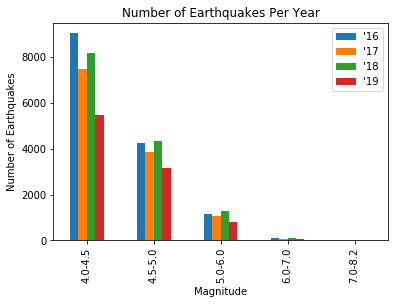

In [99]:
df['time']= df['time'].str.slice(0, 4, 1) 
df.sort_values(by=['time'], inplace=True, ascending=True)

bins=[4,4.5,5,6,7,8.3]
count= df.groupby(['time', pd.cut(df.mag, bins)])
section= count.size().unstack()
print(section)

twentyNineteen= (5489, 3141, 820, 74, 8)
twentyEighteen= (8189, 4322, 1280, 90, 15)
twentySeventeen= (7479, 3866, 1080, 81, 6)
twentySixteen= (9034, 4237, 1172, 104, 13)

xaxisRange = ['4.0-4.5','4.5-5.0','5.0-6.0','6.0-7.0','7.0-8.2']

df3 = pd.DataFrame({'\'16': twentySixteen, '\'17': twentySeventeen, '\'18':twentyEighteen, '\'19':twentyNineteen}, index=xaxisRange)
df3.plot.bar()

plt.title('Number of Earthquakes Per Year')
plt.xlabel('Magnitude')
plt.ylabel('Number of Earthquakes')

# 7) 
Find the 10 countries with the highest number of earthquakes (30 points)​ (Note: Yes, this is only countries, not full place)

In [100]:
df['Country'] = df['place'].str.split(',').str[-1]
display(df)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,"City,Country",Country
0,2016,-32.9441,-179.8061,104.49,4.6,mb,0.0,157.0,4.859,0.52,...,earthquake,17.1,16.8,0.314,3.0,reviewed,us,us,"L'Esperance Rock, New Zealand",New Zealand
10246,2016,14.7644,-87.6234,14.33,4.0,md,0.0,74.0,0.780,1.32,...,earthquake,5.1,9.4,0.000,0.0,reviewed,us,snet,"La Libertad, Honduras",Honduras
10247,2016,43.6947,148.5500,35.00,4.4,mb,0.0,107.0,4.305,0.68,...,earthquake,9.4,2.0,0.063,74.0,reviewed,us,us,"Shikotan, Russia",Russia
10248,2016,-17.1497,-177.1380,545.05,4.3,mb,0.0,278.0,4.628,0.45,...,earthquake,21.7,21.7,0.142,14.0,reviewed,us,us,Fiji region,Fiji region
10249,2016,43.8208,148.4696,35.00,4.3,mb,0.0,172.0,4.252,0.99,...,earthquake,8.1,2.0,0.108,24.0,reviewed,us,us,"Shikotan, Russia",Russia
10250,2016,43.7843,148.4072,25.01,4.8,mb,0.0,97.0,4.211,1.08,...,earthquake,9.0,4.5,0.041,181.0,reviewed,us,us,"Shikotan, Russia",Russia
10251,2016,43.8229,148.3998,29.56,4.7,mb,0.0,97.0,4.202,0.89,...,earthquake,9.2,4.7,0.046,145.0,reviewed,us,us,"Shikotan, Russia",Russia
10252,2016,-16.0172,-174.0273,82.96,4.2,mb,0.0,82.0,3.020,0.98,...,earthquake,9.2,6.1,0.167,10.0,reviewed,us,us,"Hihifo, Tonga",Tonga
10253,2016,43.8508,148.4027,24.96,5.0,mb,0.0,97.0,4.201,0.62,...,earthquake,7.0,4.5,0.033,296.0,reviewed,us,us,"Shikotan, Russia",Russia
10254,2016,12.0500,143.7578,44.31,4.6,mb,0.0,88.0,1.874,0.63,...,earthquake,11.2,7.1,0.080,47.0,reviewed,us,us,"Merizo Village, Guam",Guam


In [101]:
df['Country'].value_counts().head(10)

 Indonesia           6558
 Japan               3414
 Papua New Guinea    3085
 Fiji                2525
 New Zealand         2389
 Chile               2295
 Philippines         2084
 Alaska              1836
 Russia              1757
 Tonga               1565
Name: Country, dtype: int64

# 8)
Analyze the distribution of the Earthquake magnitudes. This is, make a histogram of the Earthquake count versus magnitude. Make sure to use a Logarithmic scale. What sort of relationship do you see? (20 points) Please add labels and colors to the plot.

Text(0, 0.5, 'Earthquake Count (int)')

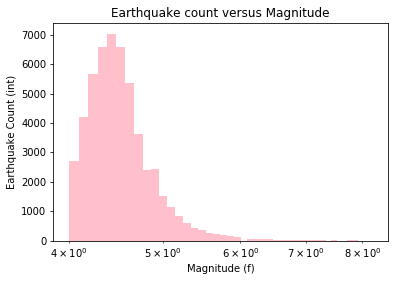

In [102]:
mpl.hist(h, bins=44, color='pink')
mpl.title('Earthquake count versus Magnitude')
mpl.xscale('log')
mpl.xlabel('Magnitude (f)')
mpl.ylabel('Earthquake Count (int)')

# 9)
Analyze the distribution of the Earthquake depths. This is, make a histogram of the Earthquake count versus depth. Make sure to use a Logarithmic scale. What sort of relationship do you see? (20 points) ​Please add labels and colors to the plot.

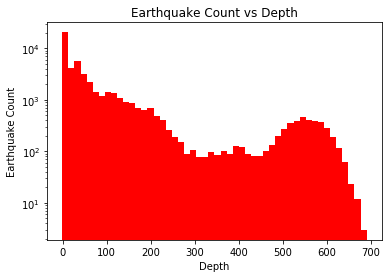

In [103]:
mpl.hist(dp, bins=50,color= 'red')
mpl.title('Earthquake Count vs Depth')
mpl.xlabel('Depth')
mpl.ylabel('Earthquake Count')
mpl.yscale('log')

# 10)
Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude. (20 points) ​Please add labels and colors to the plot.

Text(0.5, 1.0, 'Earthquake Locations')

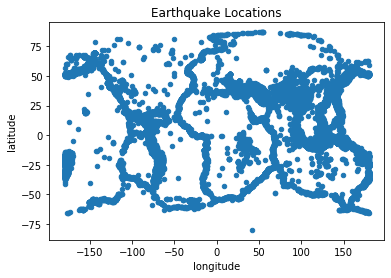

In [59]:
df.plot(x ='longitude', y='latitude', kind = 'scatter')
mpl.title('Earthquake Locations')